In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import scipy as sp
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.stats import f_oneway
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

# suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Read the speed_price_att file and save it as df1
#data sets
df1 = pd.read_csv('speed_price_att (1).csv')
df2 =  pd.read_csv('speed_price_att_other_cities (1).csv')
df3 =  pd.read_csv('speed_price_centurylink (1).csv')
df4 =  pd.read_csv('speed_price_earthlink (1).csv')
df5 =  pd.read_csv('speed_price_verizon (1).csv')

In [ ]:
#Merge the five files
df = pd.concat(([df1, df2, df3, df4, df5]), ignore_index=True)
df.head()

In [ ]:
#Find number of rows and columns of the data frame
Number_of_rows=df.shape[0]
Number_of_columns=df.shape[1]

print("Number_of_rows="+ str(Number_of_rows),"Number_of_columns="+ str(Number_of_columns))

Number_of_rows=1500880 Number_of_columns=34


In [ ]:
#Find the percentage of null values per variable
missing_percentage = df.isnull().sum() * 100 / len(df)
missing_values = pd.DataFrame({'missing_percentage': missing_percentage})
print(round(missing_values,2))

                             missing_percentage
address_full                               0.00
incorporated_place                         0.00
major_city                                 0.00
state                                      0.00
lat                                        0.00
lon                                        0.00
block_group                                0.00
collection_datetime                        0.00
provider                                   0.00
speed_down                                 0.00
speed_up                                   0.00
speed_unit                                20.45
price                                     20.88
technology                                20.88
package                                   20.88
fastest_speed_down                         0.00
fastest_speed_price                        0.00
fn                                         0.00
redlining_grade                           53.46
race_perc_non_white                     

In [ ]:
target_variable = 'technology'

Places_with_fiber = df[df['technology']=='Fiber'].shape[0] #Number of places that have Fiber as the technology used to serve the cheapest internet plan.

Places_without_fiber = df[df['technology']=='Not Fiber'].shape[0] #Number of places that do not have Fiber as the technology used to serve the cheapest internet plan.

In [ ]:
df['technology'].unique() # Verify how many levels are in the target variable

array(['Not Fiber', 'Fiber', nan, 'Copper', 'Fiber Based', 'Not fiber'],
      dtype=object)

In [ ]:
#Unify Fiber Category
df['technology'] = df['technology'].str.replace('Fiber Based','Fiber')

#Unify Not Fiber Category
df['technology'] = df['technology'].str.replace('Not fiber','Not Fiber')
df['technology'] = df['technology'].str.replace('Copper','Not Fiber')

#Create new level called Unknown
df['technology']=df['technology'].fillna('Unknown')

In [ ]:
df['technology'].unique() # Verify there are 3 levels in the 'technology' variable

array(['Not Fiber', 'Fiber', 'Unknown'], dtype=object)

In [ ]:
df.describe()

,lat,lon,block_group,collection_datetime,speed_down,speed_up,price,fastest_speed_down,fastest_speed_price,race_perc_non_white,income_lmi,ppl_per_sq_mile,n_providers,income_dollars_below_median,internet_perc_broadband,median_household_income,closest_fiber_miles,lat_closest_fiber,lon_closest_fiber,geoid
count,1.500880e+06,1.500880e+06,1.500880e+06,1.500880e+06,1.500880e+06,1.500880e+06,1.187451e+06,1.500880e+06,1.500880e+06,1.500880e+06,1.405528e+06,1.450534e+06,1.450538e+06,1.405528e+06,1.498314e+06,1.500880e+06,469233.000000,469233.000000,469233.000000,3.359200e+04
mean,3.800794e+01,-9.261584e+01,2.889654e+11,1.651377e+09,1.039443e+02,9.145158e+01,5.242945e+01,8.085975e+02,6.615421e+01,5.663635e-01,1.103511e+00,5.951216e+03,2.430802e+00,-6.273299e+03,8.031914e-01,-2.825719e+07,0.268645,40.313845,-88.381964,4.354868e+11
std,4.656687e+00,1.486959e+01,1.505735e+11,3.034754e+06,1.196287e+02,1.258120e+02,6.436187e+00,1.444958e+03,5.009321e+01,3.201522e-01,6.049438e-01,9.402988e+03,6.415604e-01,3.653010e+04,1.487993e-01,1.344683e+08,0.588893,3.187474,18.190308,4.035709e+10
min,2.954798e+01,-1.228352e+02,1.089000e+10,1.650060e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.551747e-02,0.000000e+00,1.000000e+00,-1.978370e+05,0.000000e+00,-6.666667e+08,0.000000,33.292446,-122.787987,3.903510e+11
25%,3.408330e+01,-9.767138e+01,1.703119e+11,1.650300e+09,5.000000e+00,7.500000e-01,4.995000e+01,5.000000e+00,5.000000e+01,2.700773e-01,6.890299e-01,1.417312e+03,2.000000e+00,-2.200000e+04,7.208481e-01,3.633300e+04,0.000000,39.371925,-106.568200,3.903512e+11
50%,3.968439e+01,-8.792726e+01,3.105501e+11,1.650448e+09,5.000000e+01,8.000000e+00,5.500000e+01,7.500000e+01,5.995000e+01,5.618661e-01,9.738389e-01,2.714952e+03,2.000000e+00,1.561000e+03,8.347339e-01,5.500000e+04,0.000000,40.668053,-76.032612,4.715700e+11
75%,4.132368e+01,-8.164285e+01,4.010911e+11,1.650669e+09,2.000000e+02,2.000000e+02,5.500000e+01,1.000000e+03,8.999000e+01,8.958110e-01,1.369039e+00,5.914233e+03,3.000000e+00,1.819800e+04,9.182028e-01,8.150900e+04,0.189807,40.872424,-73.952856,4.715701e+11
max,4.773402e+01,-7.100151e+01,5.602198e+11,1.664658e+09,2.000000e+03,2.000000e+03,1.149900e+02,5.000000e+03,1.899500e+02,1.000000e+00,5.293818e+00,1.928026e+05,9.000000e+00,8.176200e+04,1.000000e+00,2.500010e+05,14.042257,47.733945,-71.001510,4.715798e+11


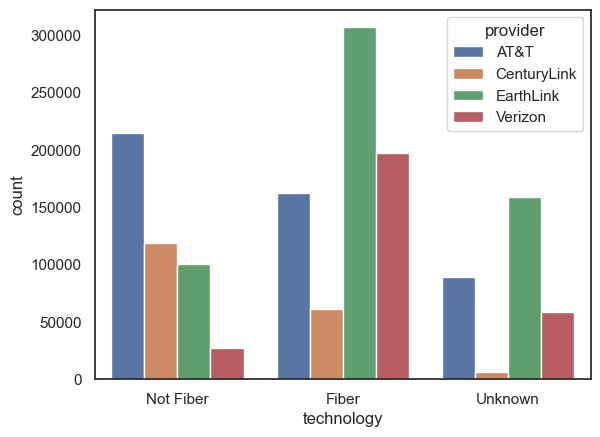

In [ ]:
sns.set(style="white")
tp=sns.countplot(x= "technology", hue = "provider", data = df)
plt.show(tp)

In [ ]:
count_Fiber = len(df[df['technology']=='Fiber'])
count_Not_Fiber = len(df[df['technology']=='Not Fiber'])
count_Unknown= len(df[df['technology']=='Unknown'])
percentage_of_fiber = count_Fiber/(count_Fiber+count_Not_Fiber+count_Unknown)
print("percentage of Fiber is", percentage_of_fiber*100)
percentage_of_not_fiber = count_Not_Fiber/(count_Fiber+count_Not_Fiber+count_Unknown)
print("percentage of Not Fiber is", percentage_of_not_fiber*100)
percentage_of_unknown=count_Unknown/(count_Fiber+count_Not_Fiber+count_Unknown)
print("percentage of Unknown is", percentage_of_unknown*100)

percentage of Fiber is 48.42585683065935
percentage of Not Fiber is 30.691127871648632
percentage of Unknown is 20.88301529769202


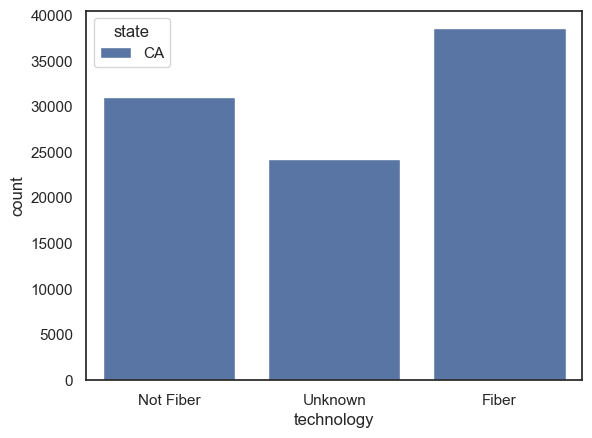

In [ ]:
sns.set(style="white")
cp=sns.countplot(x='technology', hue = 'state', data = df[df['state']=='CA'])
plt.show(cp)

In [ ]:
count_Fiber_CA=len(df[(df['technology']=='Fiber')&(df['state']=='CA')])
count_Not_Fiber_CA = len(df[(df['technology']=='Not Fiber')&(df['state']=='CA')])
count_Unknown_CA = len(df[(df['technology']=='Unknown')&(df['state']=='CA')])
percentage_of_fiber = count_Fiber_CA/(count_Fiber_CA+count_Not_Fiber_CA +count_Unknown_CA)
print("percentage of Fiber in California is", percentage_of_fiber*100)
percentage_of_not_fiber = count_Not_Fiber_CA /(count_Fiber_CA+count_Not_Fiber_CA +count_Unknown_CA)
print("percentage of Not Fiber in California is", percentage_of_not_fiber*100)
percentage_of_unknown=count_Unknown_CA/(count_Fiber_CA+count_Not_Fiber_CA +count_Unknown_CA)
print("percentage of Unknown in California is", percentage_of_unknown*100)

percentage of Fiber in California is 41.09289966665602
percentage of Not Fiber in California is 33.07453912265568
percentage of Unknown in California is 25.83256121068831


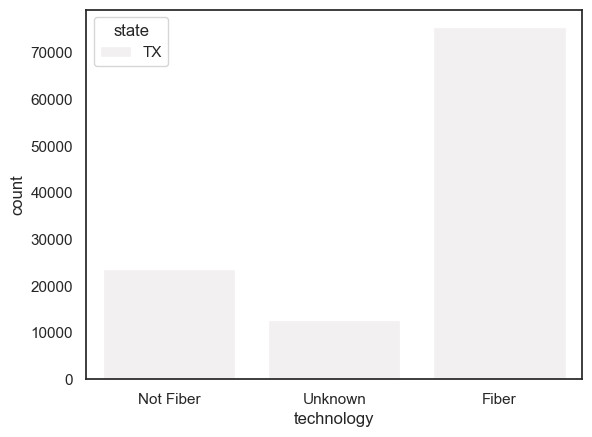

In [ ]:
sns.set(style="white")
tp=sns.countplot(x='technology', hue = 'state', data = df[df['state']=='TX'], color='red')

plt.show(tp)

In [ ]:
count_Fiber_TX=len(df[(df['technology']=='Fiber')&(df['state']=='TX')])
count_Not_Fiber_TX = len(df[(df['technology']=='Not Fiber')&(df['state']=='TX')])
count_Unknown_TX = len(df[(df['technology']=='Unknown')&(df['state']=='TX')])
percentage_of_fiber = count_Fiber_TX/(count_Fiber_TX+count_Not_Fiber_TX +count_Unknown_TX)
print("percentage of Fiber in Texas is", percentage_of_fiber*100)
percentage_of_not_fiber = count_Not_Fiber_TX /(count_Fiber_TX+count_Not_Fiber_TX +count_Unknown_TX)
print("percentage of Not Fiber in Texas is", percentage_of_not_fiber*100)
percentage_of_unknown=count_Unknown_TX/(count_Fiber_TX+count_Not_Fiber_TX +count_Unknown_TX)
print("percentage of Unknown in Texas is", percentage_of_unknown*100)

percentage of Fiber in Texas is 67.52139047005335
percentage of Not Fiber in Texas is 21.094225468084346
percentage of Unknown in Texas is 11.384384061862313


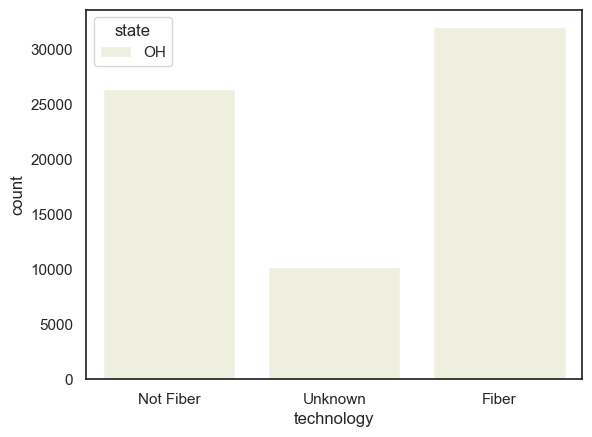

In [ ]:
sns.set(style="white")
op=sns.countplot(x='technology', hue = 'state', data = df[df['state']=='OH'], color='yellow')

plt.show(op)

In [ ]:
count_Fiber_OH=len(df[(df['technology']=='Fiber')&(df['state']=='OH')])
count_Not_Fiber_OH = len(df[(df['technology']=='Not Fiber')&(df['state']=='OH')])
count_Unknown_OH = len(df[(df['technology']=='Unknown')&(df['state']=='OH')])
percentage_of_fiber = count_Fiber_OH/(count_Fiber_OH+count_Not_Fiber_OH +count_Unknown_OH)
print("percentage of Fiber in Ohio is", percentage_of_fiber*100)
percentage_of_not_fiber = count_Not_Fiber_OH /(count_Fiber_OH+count_Not_Fiber_OH +count_Unknown_OH)
print("percentage of Not Fiber in Ohio is", percentage_of_not_fiber*100)
percentage_of_unknown=count_Unknown_OH/(count_Fiber_OH+count_Not_Fiber_OH +count_Unknown_OH)
print("percentage of Unknown in Ohio is", percentage_of_unknown*100)

percentage of Fiber in Ohio is 46.66433607178232
percentage of Not Fiber in Ohio is 38.4956010021558
percentage of Unknown in Ohio is 14.840062926061877


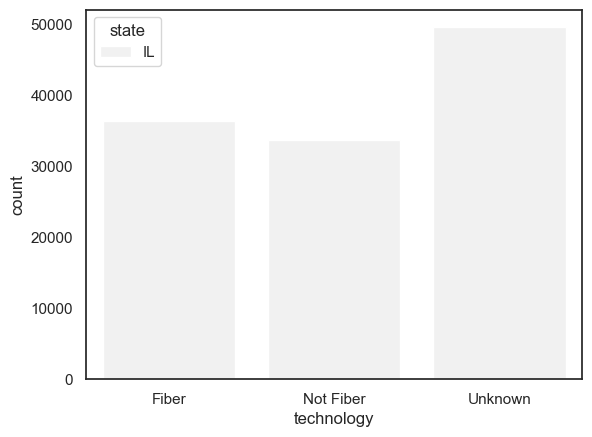

In [ ]:
sns.set(style="white")
ip=sns.countplot(x='technology', hue = 'state', data = df[df['state']=='IL'], color='black')

plt.show(ip)

In [ ]:
count_Fiber_IL=len(df[(df['technology']=='Fiber')&(df['state']=='IL')])
count_Not_Fiber_IL = len(df[(df['technology']=='Not Fiber')&(df['state']=='IL')])
count_Unknown_IL = len(df[(df['technology']=='Unknown')&(df['state']=='IL')])
percentage_of_fiber = count_Fiber_IL/(count_Fiber_IL+count_Not_Fiber_IL +count_Unknown_IL)
print("percentage of Fiber in Illinois is", percentage_of_fiber*100)
percentage_of_not_fiber = count_Not_Fiber_IL /(count_Fiber_IL+count_Not_Fiber_IL +count_Unknown_IL)
print("percentage of Not Fiber in Illinois is", percentage_of_not_fiber*100)
percentage_of_unknown=count_Unknown_IL/(count_Fiber_IL+count_Not_Fiber_IL +count_Unknown_IL)
print("percentage of Unknown in Illinois is", percentage_of_unknown*100)

percentage of Fiber in Illinois is 30.362671754447625
percentage of Not Fiber in Illinois is 28.192833592743217
percentage of Unknown in Illinois is 41.44449465280916


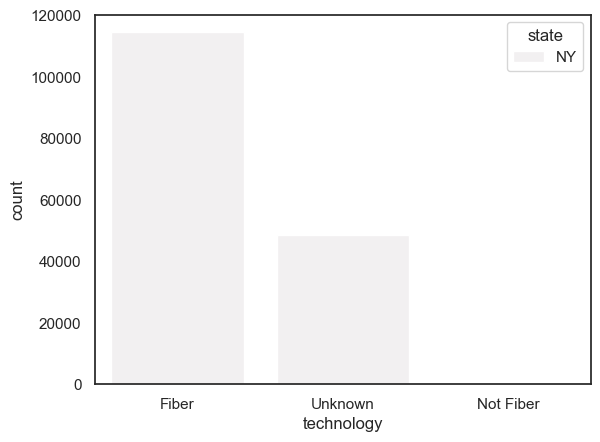

In [ ]:
sns.set(style="white")
np=sns.countplot(x='technology', hue = 'state', data = df[df['state']=='NY'], color='pink')

plt.show(np)

In [ ]:
count_Fiber_NY=len(df[(df['technology']=='Fiber')&(df['state']=='NY')])
count_Not_Fiber_NY = len(df[(df['technology']=='Not Fiber')&(df['state']=='NY')])
count_Unknown_NY = len(df[(df['technology']=='Unknown')&(df['state']=='NY')])
percentage_of_fiber = count_Fiber_NY/(count_Fiber_NY+count_Not_Fiber_NY +count_Unknown_NY)
print("percentage of Fiber in New York is", percentage_of_fiber*100)
percentage_of_not_fiber = count_Not_Fiber_NY /(count_Fiber_NY+count_Not_Fiber_NY +count_Unknown_NY)
print("percentage of Not Fiber in New York is", percentage_of_not_fiber*100)
percentage_of_unknown=count_Unknown_NY/(count_Fiber_NY+count_Not_Fiber_NY +count_Unknown_NY)
print("percentage of Unknown in New York is", percentage_of_unknown*100)

percentage of Fiber in New York is 70.12166732013331
percentage of Not Fiber in New York is 0.07474024701039012
percentage of Unknown in New York is 29.803592432856302


In [ ]:
#Average of download net speed per provider in mbps
df['speed_down'].groupby(df['provider']).mean()

provider
AT&T           124.657776
CenturyLink     94.057853
EarthLink       37.825164
Verizon        208.683665
Name: speed_down, dtype: float64

In [ ]:
#Average, minimum and maximum download net speed per provider+state in mbps
group = df.groupby(['provider', 'state']).agg({'speed_down': ['mean', 'min', 'max']})
group.columns = ['speed_down_mean', 'speed_down_min', 'speed_down_max']
grouped= group.reset_index()
print(grouped)

   provider state  speed_down_mean  speed_down_min  speed_down_max
0      AT&T    AL       187.887501             0.0           300.0
1      AT&T    AR       168.968212             0.0           300.0
2      AT&T    CA        92.170550             0.0           300.0
3      AT&T    FL       147.652776             0.0           500.0
4      AT&T    GA       188.216409             0.0           300.0
..      ...   ...              ...             ...             ...
74  Verizon    NJ       256.612151             0.0           300.0
75  Verizon    NY       209.430115             0.0           300.0
76  Verizon    PA       287.807044             0.0           300.0
77  Verizon    RI       287.892655             0.0           300.0
78  Verizon    VA       196.753930             0.0           300.0

[79 rows x 5 columns]


In [ ]:
# Group data by state
providers_d =df.groupby(['state'])

# Find slowest download provider per state in mbps
slowest_provider = providers_d['speed_down','provider'].min().reset_index()
slowest_provider = slowest_provider.sort_values('state')

# Find fastest download provider per state in mbps
fastest_provider = providers_d['speed_down','provider'].max().reset_index()
fastest_provider = fastest_provider.sort_values('state')

# Print results
print('Slowest download provider per state:')
print(slowest_provider)
print()
print('Fastest download provider per state:')
print(fastest_provider)

Slowest download provider per state:
   state  speed_down     provider
0     AL         0.0         AT&T
1     AR         0.0         AT&T
2     AZ         0.0  CenturyLink
3     CA         0.0         AT&T
4     CO         0.0  CenturyLink
5     CT         0.0    EarthLink
6     DC         0.0      Verizon
7     DE         0.0      Verizon
8     FL         0.0         AT&T
9     GA         0.0         AT&T
10    IA         0.0  CenturyLink
11    ID         0.0  CenturyLink
12    IL         0.0         AT&T
13    IN         0.0         AT&T
14    KS         0.0         AT&T
15    KY         0.0         AT&T
16    LA         0.0         AT&T
17    MA         0.0      Verizon
18    MD         0.0      Verizon
19    MI         0.0         AT&T
20    MN         0.0  CenturyLink
21    MO         0.0         AT&T
22    MS         0.0         AT&T
23    MT         0.0  CenturyLink
24    NC         0.0         AT&T
25    ND         0.0  CenturyLink
26    NE         0.0  CenturyLink
27    NJ   

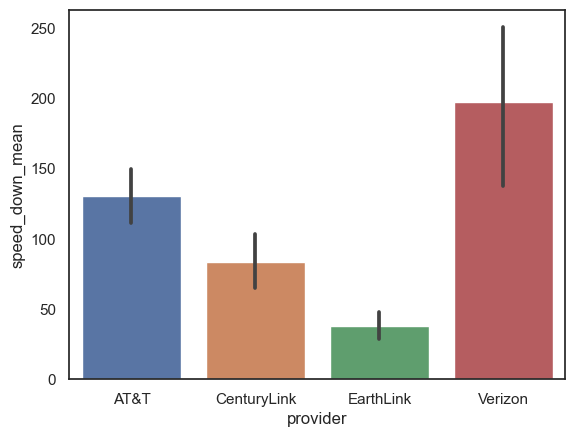

In [ ]:
# Find fastest provider
fastest_provider = grouped.sort_values('speed_down_mean', ascending=False).iloc[0]['provider']

# Plot barchart
sns.barplot(x='provider', y='speed_down_mean', data=grouped)

# Show plot
plt.show()

In [ ]:
#Average of upload net speed per provider in mbps
df['speed_up'].groupby(df['provider']).mean()

provider
AT&T           108.387441
CenturyLink     68.627156
EarthLink       26.870363
Verizon        207.882375
Name: speed_up, dtype: float64

In [ ]:
#Average, minimum and maximum upload net speed per provider+state in mbps
group = df.groupby(['provider', 'state']).agg({'speed_up': ['mean', 'min', 'max']})
group.columns = ['speed_up_mean', 'speed_up_min', 'speed_up_max']
grouped= group.reset_index()
print(grouped)

   provider state  speed_up_mean  speed_up_min  speed_up_max
0      AT&T    AL     186.550635           0.0         300.0
1      AT&T    AR     154.928892           0.0         300.0
2      AT&T    CA      78.236705           0.0         300.0
3      AT&T    FL     131.248857           0.0         500.0
4      AT&T    GA     180.835002           0.0         300.0
..      ...   ...            ...           ...           ...
74  Verizon    NJ     255.557426           0.0         300.0
75  Verizon    NY     209.423487           0.0         300.0
76  Verizon    PA     287.655517           0.0         300.0
77  Verizon    RI     287.892655           0.0         300.0
78  Verizon    VA     194.874056           0.0         300.0

[79 rows x 5 columns]


In [ ]:
# Group data by state
providers_d =df.groupby(['state'])

# Find slowest upload provider per state in mbps
slowest_provider = providers_d['speed_up','provider'].min().reset_index()
slowest_provider = slowest_provider.sort_values('state')

# Find fastest upload provider per state in mbps
fastest_provider = providers_d['speed_up','provider'].max().reset_index()
fastest_provider = fastest_provider.sort_values('state')

# Print results
print('Slowest upload provider per state:')
print(slowest_provider)
print()
print('Fastest upload provider per state:')
print(fastest_provider)

Slowest upload provider per state:
   state  speed_up     provider
0     AL       0.0         AT&T
1     AR       0.0         AT&T
2     AZ       0.0  CenturyLink
3     CA       0.0         AT&T
4     CO       0.0  CenturyLink
5     CT       0.0    EarthLink
6     DC       0.0      Verizon
7     DE       0.0      Verizon
8     FL       0.0         AT&T
9     GA       0.0         AT&T
10    IA       0.0  CenturyLink
11    ID       0.0  CenturyLink
12    IL       0.0         AT&T
13    IN       0.0         AT&T
14    KS       0.0         AT&T
15    KY       0.0         AT&T
16    LA       0.0         AT&T
17    MA       0.0      Verizon
18    MD       0.0      Verizon
19    MI       0.0         AT&T
20    MN       0.0  CenturyLink
21    MO       0.0         AT&T
22    MS       0.0         AT&T
23    MT       0.0  CenturyLink
24    NC       0.0         AT&T
25    ND       0.0  CenturyLink
26    NE       0.0  CenturyLink
27    NJ       0.0      Verizon
28    NM       0.0  CenturyLink
29   

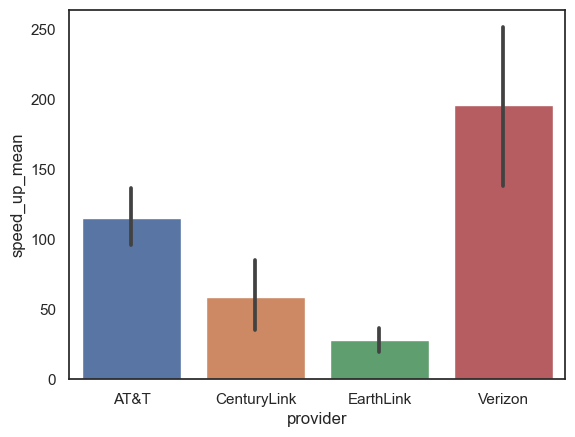

In [ ]:
# Find fastest provider
fastest_provider = grouped.sort_values('speed_up_mean', ascending=False).iloc[0]['provider']

# Plot barchart
sns.barplot(x='provider', y='speed_up_mean', data=grouped)

# Show plot
plt.show()

In [ ]:
#Highest price per provider
df['price'].groupby(df['provider']).max()

provider
AT&T            65.00
CenturyLink     50.00
EarthLink       79.95
Verizon        114.99
Name: price, dtype: float64

In [ ]:
#Lowest price per provider
df['price'].groupby(df['provider']).min()

provider
AT&T            0.00
CenturyLink    49.00
EarthLink      49.95
Verizon        39.99
Name: price, dtype: float64

In [ ]:
df['price'].groupby(df['technology']).min()

technology
Fiber         0.0
Not Fiber    40.0
Unknown       NaN
Name: price, dtype: float64

In [ ]:
df['price'].groupby(df['technology']).max()

technology
Fiber        114.99
Not Fiber     79.95
Unknown         NaN
Name: price, dtype: float64

In [ ]:
#Average, minimum and maximum price per provider+state
group_s = df.groupby(['state', 'provider']).agg({'price': ['mean', 'min', 'max']})
group_s.columns = ['price_mean', 'price_min', 'price_max']
grouped_s= group_s.reset_index()
print(grouped_s)

   state     provider  price_mean  price_min  price_max
0     AL         AT&T   54.950199      30.00      55.00
1     AL    EarthLink   59.950000      59.95      59.95
2     AR         AT&T   55.000000      55.00      55.00
3     AR    EarthLink   59.950000      59.95      59.95
4     AZ  CenturyLink   50.000000      50.00      50.00
..   ...          ...         ...        ...        ...
74    WI         AT&T   54.996546      30.00      55.00
75    WI    EarthLink   59.950000      59.95      59.95
76    WV    EarthLink   61.362037      49.95      69.95
77    WY  CenturyLink   50.000000      50.00      50.00
78    WY    EarthLink   49.950000      49.95      49.95

[79 rows x 5 columns]


In [ ]:
# Group data by state
providers_s = df.groupby(['state'])

# Find cheapest provider per state
cheapest_providers = providers_s['price','provider'].min().reset_index()
cheapest_providers = cheapest_providers.sort_values('state')

# Find most expensive provider per state
expensive_providers = providers_s['price','provider'].max().reset_index()
expensive_providers = expensive_providers.sort_values('state')

# Print results
print('Cheapest providers:')
print(cheapest_providers)
print()
print('Most expensive providers:')
print(expensive_providers)

Cheapest providers:
   state  price     provider
0     AL  30.00         AT&T
1     AR  55.00         AT&T
2     AZ  49.95  CenturyLink
3     CA  30.00         AT&T
4     CO  49.95  CenturyLink
5     CT  49.95    EarthLink
6     DC  39.99      Verizon
7     DE  39.99      Verizon
8     FL   0.00         AT&T
9     GA  30.00         AT&T
10    IA  49.95  CenturyLink
11    ID  49.95  CenturyLink
12    IL  30.00         AT&T
13    IN  55.00         AT&T
14    KS  55.00         AT&T
15    KY  30.00         AT&T
16    LA  30.00         AT&T
17    MA  39.99      Verizon
18    MD  39.99      Verizon
19    MI   0.00         AT&T
20    MN  50.00  CenturyLink
21    MO  49.95         AT&T
22    MS  55.00         AT&T
23    MT  49.95  CenturyLink
24    NC   0.00         AT&T
25    ND  49.95  CenturyLink
26    NE  49.95  CenturyLink
27    NJ  39.99      Verizon
28    NM  49.00  CenturyLink
29    NV  49.95  CenturyLink
30    NY  39.99      Verizon
31    OH  30.00         AT&T
32    OK  30.00        

In [ ]:
#Drop 'incorporated_place','lat', 'lon','speed_unit' as these variables do not add value to this analysis
df=df.drop(['incorporated_place','lat', 'lon','collection_datetime','speed_unit','race_perc_non_white'], axis=1)

In [ ]:
df=df.dropna(thresh=df.shape[0]*0.75,how='all',axis=1) # Drop columns with more than 75% of missing values

In [ ]:
numerical_var =  list((set(df.columns) - set(df.dtypes[df.dtypes == object].index))- set(['technology'])) #Find numerical variables
categorical_var = list((set(df.columns) - set(df.dtypes[df.dtypes != object].index))- set(['technology']))  #Find categorical variables

In [ ]:
zero_variance_numerical_variables =  list(df[sorted(numerical_var)].std()[round(df[sorted(numerical_var)].std(),4)==0].index) # your code to find the
 #Find numerical variables with standard deviation equal 0 and drop them from the dataframe

df = df.drop(zero_variance_numerical_variables, axis=1)

In [ ]:
zero_variance_categorical_variables = [] #Find the categorical variables with zero variance to drop them from the dataframe

for i in categorical_var:
    if len(df[i].value_counts().index) == 1:
        zero_variance_categorical_variables.append(i)

df = df.drop(zero_variance_categorical_variables, axis = 1)

In [ ]:
categorical_var = list((set(df.columns) - set(df.dtypes[df.dtypes != object].index))- set(['technology']))
high_cardinality = [] #Find categorical variables with more than 60 levels to drop them from the dataframe

for i in categorical_var:
    if len(df[i].value_counts().index) > 60:
        high_cardinality.append(i)

df = df.drop(high_cardinality, axis = 1)

In [ ]:
#Standardize numerical variables to create consistency among the data
num_variables = list((set(df.columns) - set(df.dtypes[df.dtypes == object].index))- set(['price'])) #Find numerical variables remaining in the df and subtract the target variable

array = df[num_variables].values
data_scaler = StandardScaler().fit(array)

df[num_variables] =pd.DataFrame(data_scaler.transform(array))

In [ ]:
# Find numerical values remaining in the dataframe
numerical_variables = list((set(df.columns) - set(df.dtypes[df.dtypes == object].index))- set(['technology']))

# Find missing values for the numerical columns and overwrite those with median
df[numerical_variables] = df[numerical_variables].fillna(df[numerical_variables].median(), inplace = False)

# Find numerical values remaining in the dataframe
categorical_variables = list((set(df.columns) - set(df.dtypes[df.dtypes != object].index))- set(['technology']))

# Find missing values for the categorical columns and overwrite those with the mode
df[categorical_variables] = df[categorical_variables].fillna(df[categorical_variables].mode(), inplace = False)


In [ ]:
[sum(df[i].isnull()) for i in df.columns] # Verify there is no null values

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
df=df[df['technology']!='Unknown']

In [ ]:
#Create dummy categorical variables
categorical_var = list(df.dtypes[df.dtypes == object].index)
dummy_categories=pd.get_dummies(df[categorical_var], drop_first=False)
df = df.drop(categorical_variables, axis = 1)
df = pd.concat([df, dummy_categories], axis = 1)

In [ ]:
df.head()

,block_group,speed_down,speed_up,price,technology,fastest_speed_down,fastest_speed_price,income_lmi,ppl_per_sq_mile,n_providers,...,state_WA,state_WI,state_WV,state_WY,provider_AT&T,provider_CenturyLink,provider_EarthLink,provider_Verizon,technology_Fiber,technology_Not Fiber
0,-1.846776,-0.862472,-0.723839,55.0,Not Fiber,-0.559068,-0.222669,-1.193115,-0.578447,2.44591,...,0,0,0,0,1,0,0,0,0,1
1,-1.846776,-0.827096,-0.718943,55.0,Not Fiber,-0.556139,-0.222669,-1.193115,-0.578447,2.44591,...,0,0,0,0,1,0,0,0,0,1
2,-1.846776,-0.862472,-0.723839,55.0,Not Fiber,-0.559068,-0.222669,-1.193115,-0.578447,2.44591,...,0,0,0,0,1,0,0,0,0,1
3,-1.846776,-0.827096,-0.718943,55.0,Not Fiber,-0.556139,-0.222669,-1.193115,-0.578447,2.44591,...,0,0,0,0,1,0,0,0,0,1
4,-1.846776,1.638870,1.657620,55.0,Fiber,2.900711,2.272680,-1.193115,-0.578447,2.44591,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
df=df.drop(['technology_Not Fiber'],axis=1)

count    1.187451e+06
mean     5.242945e+01
std      6.436187e+00
min      0.000000e+00
25%      4.995000e+01
50%      5.500000e+01
75%      5.500000e+01
max      1.149900e+02
Name: price, dtype: float64




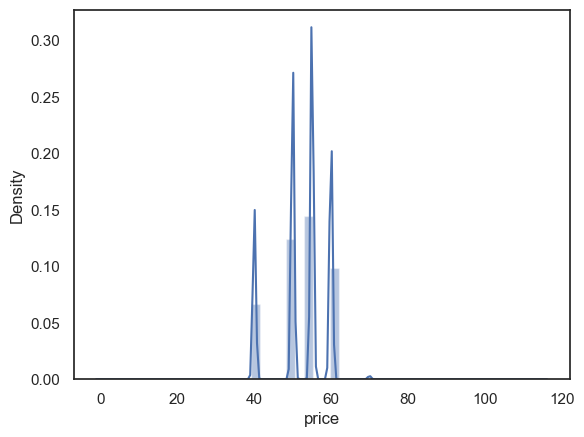

In [ ]:
print(df['price'].describe()) # Describe output variable
print('\n')
px = sns.distplot(df['price']) #check distribution of the output variable

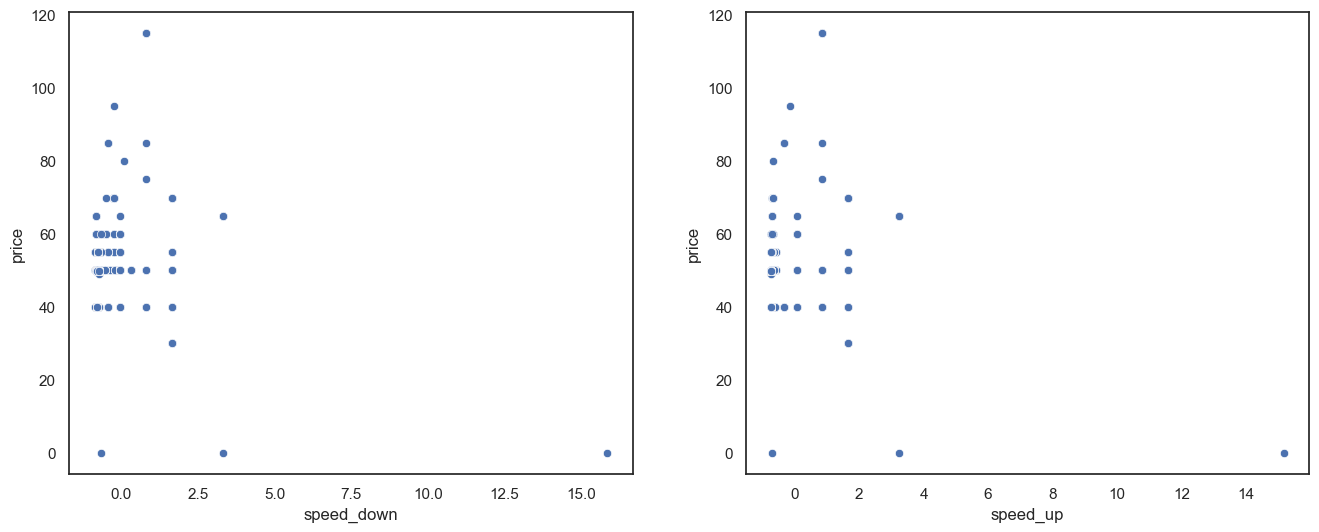

In [ ]:
#scatter plots to check how speed_down and speed_up variables are related to price

fig, pxs = plt.subplots(ncols=2, figsize= (16, 6)) # Divide the plotting area into sub-areas

plt.subplot(1, 2, 1) # First plot
px = sns.scatterplot(x='speed_down', y='price', data=df) # scatter plot for x='speed_down', y='price'

plt.subplot(1, 2, 2) #Second plot
px = sns.scatterplot(x='speed_up', y='price', data=df) # scatter plot for x='speed_up', y='price'

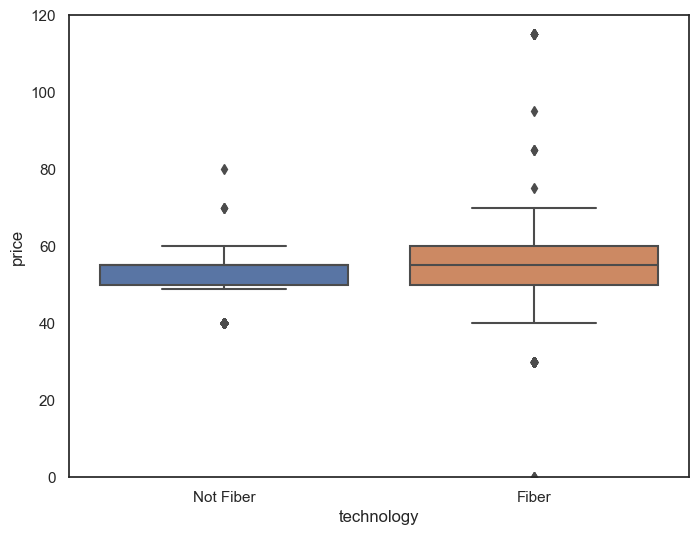

In [ ]:
#Box plot to see how provider variable is related to price
f, ppx = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='technology', y="price", data=df) # plots the data on a box plot
fig.axis(ymin=0, ymax=120); # sets the limit for y axis

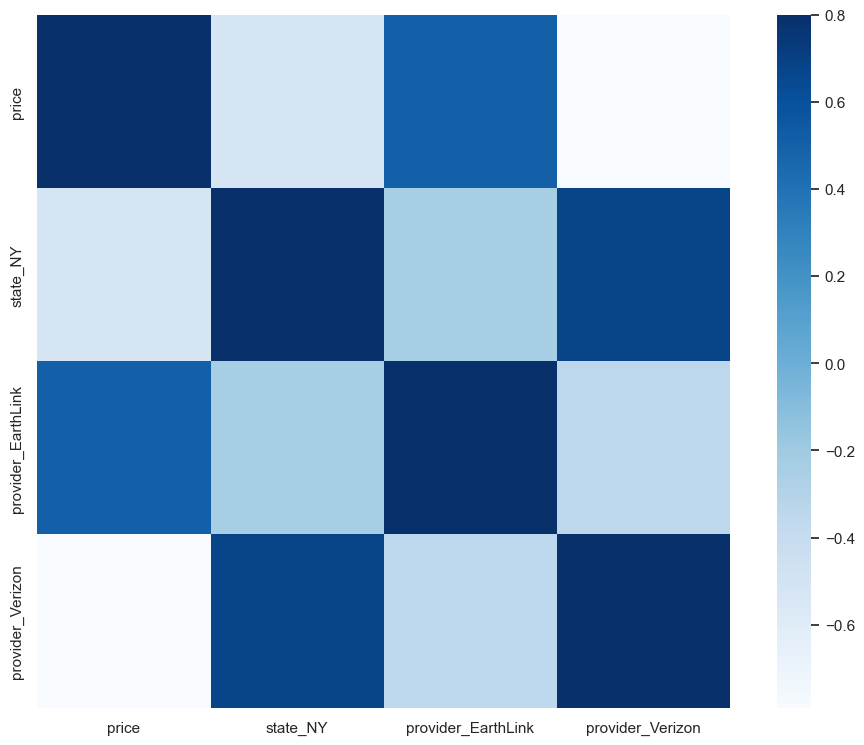

In [ ]:
#correlation matrix

# computes the person correlation among variables
corrmat = df.corr()

# returns highly correlated variables
high_c = corrmat[corrmat['price'].abs()>0.5].index

# plots a correlation plot
f, px = plt.subplots(figsize=(12, 9)) # determines the figure size
px = sns.heatmap(corrmat.loc[high_c, high_c], vmax=.8, square=True, cmap="Blues") # creates a heatmap using the correlation matrix

In [ ]:
corrmat[corrmat['price'].abs()>=0.5]

,block_group,speed_down,speed_up,price,fastest_speed_down,fastest_speed_price,income_lmi,ppl_per_sq_mile,n_providers,income_dollars_below_median,...,state_VA,state_WA,state_WI,state_WV,state_WY,provider_AT&T,provider_CenturyLink,provider_EarthLink,provider_Verizon,technology_Fiber
price,-0.134311,-0.374311,-0.381319,1.000000,0.160400,0.153824,0.016565,-0.401236,0.149585,-0.001945,...,-0.177647,-0.061482,0.117567,0.045875,-0.021551,0.271471,-0.159588,0.506188,-0.790401,0.016879
state_NY,0.140771,0.453398,0.455167,-0.521847,0.013591,0.080710,-0.015447,0.613305,-0.055734,0.009457,...,-0.034692,-0.052789,-0.050325,-0.010802,-0.018517,-0.222655,-0.138168,-0.235903,0.677485,0.259454
provider_EarthLink,-0.076076,-0.472480,-0.430316,0.506188,0.041604,0.140327,0.022304,-0.189301,0.031576,-0.019155,...,-0.076628,0.021567,0.042568,0.045792,0.003495,-0.491805,-0.305187,1.000000,-0.348204,0.210132
provider_Verizon,0.175360,0.528043,0.538663,-0.790401,-0.028632,0.033688,-0.023612,0.531752,-0.100825,0.014210,...,0.220065,-0.077918,-0.074282,-0.015945,-0.027332,-0.328650,-0.203942,-0.348204,1.000000,0.262709


In [ ]:
df=df.drop(['technology'],axis=1)

F-statistic: 76529149.92419697
P-value: 0.0


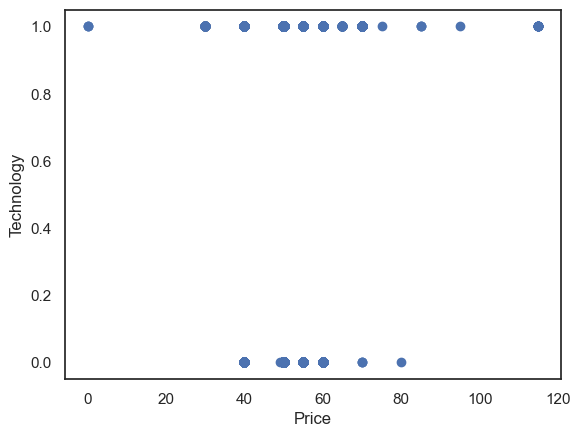

In [ ]:
# Extract the "price" and "technology" columns from the DataFrame
price = df["price"]
technology = df["technology_Fiber"]

# Perform the ANOVA test
f_statistic, p_value = f_oneway(price, technology)

# Print the results of the ANOVA test
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Plot the scatterplot
plt.scatter(price, technology)
plt.xlabel("Price")
plt.ylabel("Technology")
plt.show()

In [ ]:
df['technology_Fiber'].value_counts()

1    726814
0    460637
Name: technology_Fiber, dtype: int64

In [ ]:
os = SMOTE(random_state=0) # Smote technique to balance the data

input_var = list(set(df.columns) - set(['technology_Fiber'])) # sets the input var

X, Y = os.fit_resample(df[df.columns.difference(['technology_Fiber'])], df['technology_Fiber']) # oversamples the data
X = pd.DataFrame(X, columns = input_var) # data frame containing the input variables after balancing
Y = pd.DataFrame(Y, columns = ['technology_Fiber']) # dataframe containing the output variable 'technology_Fiber' after balancing

df = pd.concat([X, Y], axis=1) # Combine X and Y

In [ ]:
df['technology_Fiber'].value_counts()

0    726814
1    726814
Name: technology_Fiber, dtype: int64

In [ ]:
from sklearn import datasets, linear_model, metrics

X = df[['provider_Verizon','speed_up','state_NY']] # Define input variables
y = df['price'] # Define the target variable or response variable

# create linear regression object
regression = linear_model.LinearRegression()

# Fit the model
regression.fit(X, y)

#Predict the price when the provider is not Verizon, upload speed is 50 mbps and the client is in New York
predicted_price = regression.predict([[0,50,1]])

print(predicted_price)

[84.55854252]


In [ ]:
# regression coefficients
print('Coefficients: ', regression.coef_)

print('Variance score: {}'.format(regression.score(X, y)))

print('R2 value:' +str(round(100*regression.score(X, y),2)))

Coefficients:  [-13.72241971   0.59320069   0.26845993]
Variance score: 0.6105308692572993
R2 value:61.05


In [ ]:
pred_vs_actual = pd.DataFrame()
pred_vs_actual['actual'] = y
pred_vs_actual['predicted'] = regression.predict(X)
pred_vs_actual['error'] = pred_vs_actual['actual'] - pred_vs_actual['predicted']
print(pred_vs_actual.head())

   actual  predicted     error
0    55.0  54.200666  0.799334
1    55.0  54.203571  0.796429
2    55.0  54.200666  0.799334
3    55.0  54.203571  0.796429
4    55.0  55.613350 -0.613350


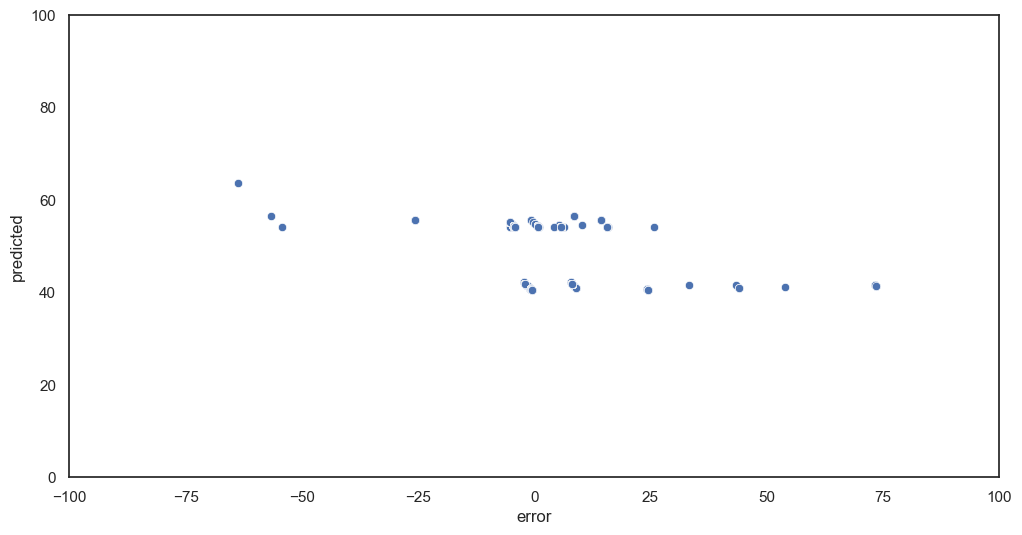

In [ ]:
fig, lx = plt.subplots(figsize=(12,6)) # Determines the figure size
lx = sns.scatterplot(x='error', y='predicted', data=pred_vs_actual)
#plots the error vs. predicted
limits = lx.set(xlim=(-100, 100), ylim=(0, 100)) #sets the limit for x and y axis

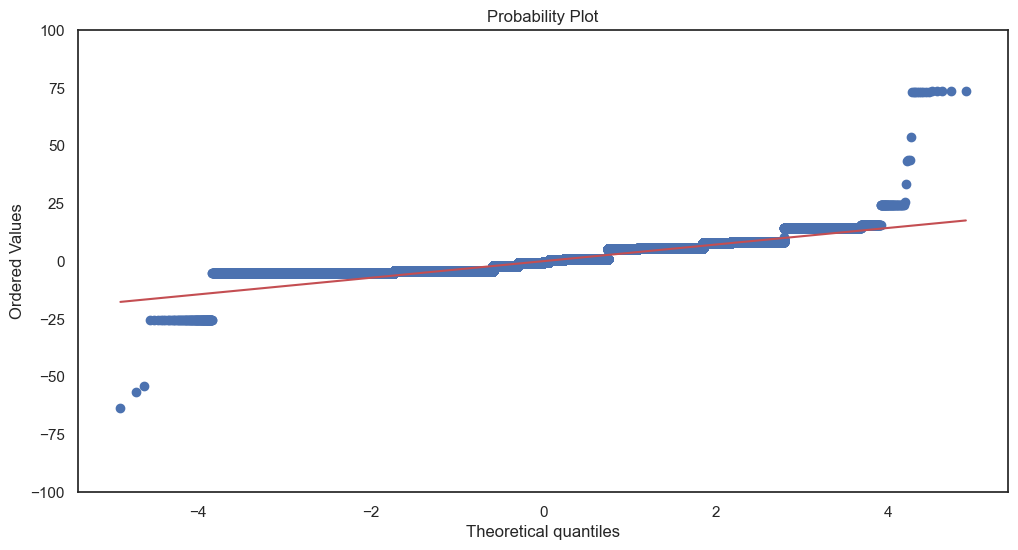

In [ ]:
fig, lx = plt.subplots(figsize=(12,6)) # Determines the figure size


_, (__, ___, r) = sp.stats.probplot(pred_vs_actual['error'], plot=lx, fit=True)
# generates the normality plot

limits = lx.set(ylim=(-100, 100)) # sets the limits for the graph

In [ ]:
input_variables = set(df.columns) - set(['technology_Fiber'])
X = df[input_variables]
Y = df['technology_Fiber'] # Target variable for logistic regression model

# splitting X and y into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42) # Split the data frame in test and train


In [ ]:
# Logistic Regression
lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr') # creates a lR instance
lr.fit(X_train, Y_train)

LogisticRegression(multi_class='ovr', random_state=0)

In [ ]:
lr.classes_

array([0, 1], dtype=uint8)

In [ ]:
lr.intercept_
lr.coef_

array([[ 1.40800499e+00, -3.56239796e+00,  1.34391091e+00,
         1.29166755e+00,  1.47282989e+00,  6.42826826e-01,
        -3.42723856e+00, -3.61111096e+00, -1.73127282e+00,
         2.98167220e-01,  1.37144337e+00,  1.45871265e-02,
         1.05363930e+00, -7.79613278e-01,  1.45586358e+00,
         1.06064460e+00,  1.94324535e+00,  1.09722694e+00,
         3.08051391e+01, -3.42723856e+00, -9.69062088e-01,
        -1.09735053e+00,  3.29394310e-01,  1.29166755e+00,
         4.24141098e-01,  9.48499862e-01, -1.62797777e+00,
         1.40800499e+00,  1.16690680e-01,  3.02604885e+00,
        -1.73127282e+00, -9.69062088e-01,  1.47282989e+00,
        -2.04428462e+00, -3.56239796e+00, -2.57416229e+00,
         1.48105185e-02, -2.40233977e+00,  9.29448019e-02,
         1.33348127e+01, -1.47345906e+00,  1.52150876e+00,
         1.41559768e+00,  1.31529740e+00,  8.47381681e-01,
        -2.45349740e+00, -1.62797777e+00,  1.52150876e+00,
        -1.69654307e+00,  1.32224055e-01,  1.32224055e-0

In [ ]:
def get_performance(actual_Y, pred_Y):
    cm = confusion_matrix(actual_Y, pred_Y)
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    return accuracy, sensitivity, specificity

In [ ]:
pred_Y_lr = lr.predict(X_test)
pred_Y_lr

array([1, 1, 1, ..., 1, 1, 0], dtype=uint8)

In [ ]:
accuracy_lr, sensitivity_lr, specificity_lr = get_performance(Y_test, pred_Y_lr)
accuracy_lr, sensitivity_lr, specificity_lr

(0.995322055818881, 0.997328494379757, 0.9933122188561462)

In [ ]:
score_Y_lr = lr.predict_proba(X_test)
score_Y_lr

array([[0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       ...,
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [9.99999999e-01, 5.87350855e-10]])

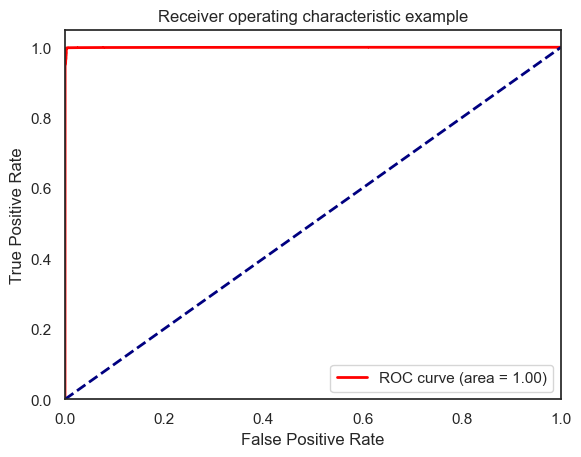

In [ ]:
score_Y_lr = lr.predict_proba(X_test)
fpr, tpr, _ = roc_curve(Y_test, score_Y_lr[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc

0.9996043508585165